# Clasificador por minima distancia

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from pandas import DataFrame,Series
from numpy import zeros,amin,sqrt

## Generando el dataset (training data)

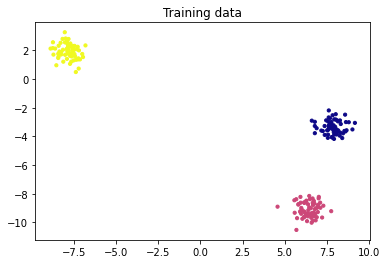

In [63]:
training_data, labels = make_blobs(n_samples=200,centers=3,cluster_std=0.5,random_state=6)
plt.scatter(training_data[:,0],training_data[:,1],s=10,c=labels,cmap='plasma')
plt.title("Training data") 

## Generando test_data

Text(0.5, 1.0, 'Test_data')

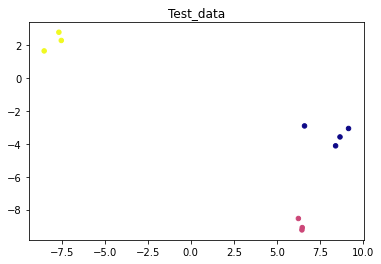

In [74]:
test_data, labels_test_data,centers_test_data = make_blobs(n_samples=10,centers=3,cluster_std=0.5,random_state=6,return_centers=True)
plt.scatter(test_data[:,0],test_data[:,1],s=20,c=labels_test_data,cmap='plasma')
plt.title("Test_data")

### Graficando ambos 

Text(0.5, 1.0, 'Training and Test data')

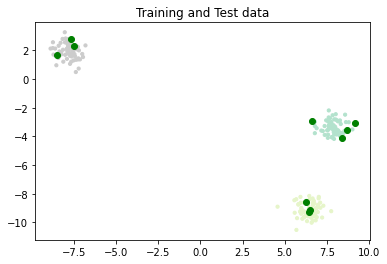

In [65]:
plt.scatter(training_data[:,0],training_data[:,1],s=10,c=labels,cmap='Pastel2')
plt.scatter(test_data[:,0],test_data[:,1],c='green')
plt.title("Training and Test data")

## Aplicando el algoritmo K-means a training data

In [66]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(training_data)
labels_kmeans = kmeans.predict(training_data)

### Mostrando resultados del K-means

Text(0.5, 1.0, 'Centroides y test data')

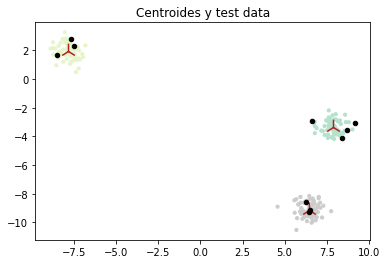

In [68]:
plt.scatter(training_data[:,0],training_data[:,1],c=labels_kmeans,s=10,cmap='Pastel2')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],c='firebrick', s = 250,marker='2')
plt.scatter(test_data[:,0],test_data[:,1],c='black',s=20)
plt.title("Centroides y test data")

## Calculando la distancia ecuclidea de test_data a cada centroide

In [69]:
def asignar_grupo(test_data,centroids):
    predicted_labels = zeros((len(test_data),1))
    distance_matrix = zeros((len(test_data),len(centroids)))
    for i in range(len(test_data)):
        diff = test_data[i] - centroids #Esto es una matriz resto el pivote al array de centroides
        d2 = diff[:,0]*diff[:,0]+diff[:,1]*diff[:,1] #Calculo la distancia al cuadrado sumando las columnas de la matriz al cuadrado
        distance_matrix[i] = sqrt(d2) #aplico raíz cuadrada a cada elemento
        minimun_distance = amin(distance_matrix[i]) #localizo el valor de distancia minimo
        temp = list(distance_matrix[i]) #convierto a lista para poder localizar el indice
        group = temp.index(minimun_distance) #localizo el indice
        predicted_labels[i] = group #El índice me define el grupo al que pertenece
    return predicted_labels,distance_matrix

In [70]:
predicted_labels, distance_matrix = asignar_grupo(test_data,centroids)


Text(0.5, 1.0, 'Centroides y test data')

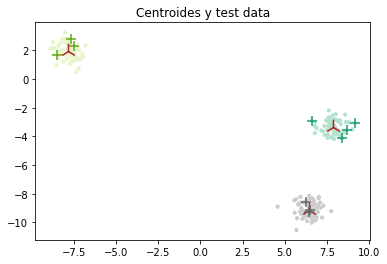

In [71]:
plt.scatter(training_data[:,0],training_data[:,1],c=labels_kmeans,s=10,cmap='Pastel2')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],c='firebrick', s = 250,marker='2')
plt.scatter(test_data[:,0],test_data[:,1],c=predicted_labels,cmap='Dark2',s=100,marker='+')
plt.title("Centroides y test data")

## Creado DataFrame en Pandas

In [73]:
index = ["Punto 1","Punto 2","Punto 3", "Punto 4", "Punto 5","Punto 6","Punto 7","Punto 8", "Punto 9", "Punto 10"]
col = ["Centroide 1", "Centroide 2", "Centroide 3"]

df = DataFrame(distance_matrix,index = index ,columns= col)
df["Predicted label"] = predicted_labels.astype(int)
df["real labels"] = labels_test_data
df.round(3)

,Centroide 1,Centroide 2,Centroide 3,Predicted label,real labels
Punto 1,17.168,0.729,18.436,1,2
Punto 2,1.355,15.240,6.202,0,0
Punto 3,5.431,17.561,0.584,2,1
Punto 4,0.921,17.348,5.366,0,0
Punto 5,1.322,17.729,6.634,0,0
Punto 6,16.737,0.901,18.462,1,2
Punto 7,16.428,0.494,18.034,1,2
Punto 8,0.817,17.409,5.964,0,0
Punto 9,6.047,18.147,0.143,2,1
Punto 10,5.905,18.073,0.044,2,1
